In [1168]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [1169]:
img0 =  cv2.imread('me1.jpg',0)
mask0 = cv2.imread('mask.bmp',0)
mask01 = mask0[:,:]
img01 = np.array(img0[:,:])

In [1170]:
i01 =  cv2.imread('1.jpg',0)
i02 = cv2.imread('2.jpg',0)
i03 =  cv2.imread('3.jpg',0)
i04 = cv2.imread('4.jpg',0)

In [1171]:
img = cv2.resize(img0,(300,400))
img1 = cv2.resize(img01,(300,400))
mask = cv2.resize(mask0,(300,400))
mask1 = cv2.resize(mask01,(300,400))
i1 =  cv2.resize(i01,(300,400))
i2 = cv2.resize(i02,(300,400))
i3 =  cv2.resize(i03,(300,400))
i4 = cv2.resize(i04,(300,400))
i_main = [img,i1,i2,i3,i4]

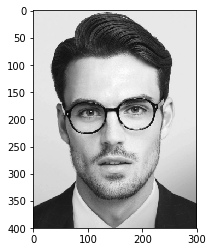

In [1172]:
%matplotlib inline
plt.imshow(img,cmap='gray')

In [1173]:
height, width= mask1.shape

for i in range(0, height):
    for j in range(0, width):
        if mask1[i,j] !=0:
            mask1[i,j] = 255
thresh = mask1

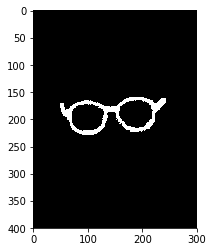

In [1174]:
%matplotlib inline
plt.imshow(thresh,cmap='gray')

400

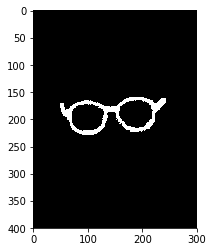

In [1175]:

%matplotlib inline
plt.imshow(thresh,cmap='gray')
len(thresh)

In [1181]:
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours_count = 0
contours = None
w = 4
check = 0
for i in range(100,len(thresh)-150):
    for j in range(50,len(thresh[0])-50):
        count = 0
        for k in range(-w,w):
            for l in range(-w,w):
                if thresh[i+k][j+l] != 0:
                    count+=1
                    check = 1            
        if check==1 and count == 15:
            contours_count = count
            contours = [i,j]
            break
        else:
            check = 0
    if check == 1:
        break
        
count 
x,y = contours
contours

[157, 188]

In [1182]:
size1= len(contours)
size1

2

In [1183]:

w = 4
patches_img = []
patches_mask = []

for k in range(size1):
    patch_img = []
    patch_mask = []
    x,y = contours[k][0][0]
    for i in range(-w,w):
        for j in range(-w,w):
            patch_img.append(img1[x+j,y+i])
            patch_mask.append(mask1[x+j,y+i])
    patches_img.append(patch_img)
    patches_mask.append(patch_mask)

#patches_img[0]

TypeError: 'int' object is not subscriptable

In [ ]:
counts = []
for k in range(size1):
    count = 0
    for i in patches_mask[k]:
        #print(i)
        if i <=127 :
            count = count + 1
    counts.append(count)

In [1184]:
np.argmax(counts)
for i in range(len(counts)):
    if counts[i] == 64:
        counts[i] = 0

ValueError: attempt to get argmax of an empty sequence

In [1185]:
counts_c = counts[:]
max_ind = []
max_i = np.argmax(counts_c)
counts_c[max_i] = 0
max_ind = max_i
counts[max_ind]

ValueError: attempt to get argmax of an empty sequence

In [1186]:
size2 = 64
Basis_T = []
w = 4
for i in range(5):
    i_temp = i_main[i]
    x,y = i_temp.shape
    B = [0]*64
    for j in range(2000):
        count = 0
        x_1 = random.randint(20,x-20)
        y_1  =random.randint(20,y-20)
        for k in range(-w,w):
            for l in range(-w,w):
                B[count] = i_temp[x_1 + l][y_1 + k]
                count += 1
        Basis_T.append(B/np.linalg.norm(B))
print(len(Basis_T))
#Basis_T.shape
size5
                

10000


10000

In [1028]:
size5 = len(Basis_T)
B = []
for i in range(256):
    x = random.randint(0,size5-1)
    B.append(Basis_T[x])
Basis = np.array(np.transpose(B),ndmin = 2)
Basis.shape

(64, 256)

In [1033]:
patches_img_sub = []
Basis_sub = []
patch_img_sub = []
basis_sub = []
for k in range(64):
    if patches_mask[max_ind][k] <=127:
        patch_img_sub.append(patches_img[max_ind][k])
        basis_sub.append(Basis[k])
Basis_sub = np.array(basis_sub)
patches_img_sub = patch_img_sub

In [1034]:
print(len(patches_img_sub))
np.shape(Basis_sub)
Basis_sub

63


array([[ 0.12695971,  0.13161207,  0.13152506, ...,  0.08701464,
         0.125     ,  0.0470313 ],
       [ 0.12695971,  0.12757489,  0.13152506, ...,  0.08612673,
         0.125     ,  0.13227554],
       [ 0.12695971,  0.11788566,  0.12997771, ...,  0.08612673,
         0.125     ,  0.13619481],
       ..., 
       [ 0.12695971,  0.13403438,  0.12069359, ...,  0.12785824,
         0.125     ,  0.16264992],
       [ 0.12695971,  0.1098113 ,  0.12069359, ...,  0.12164291,
         0.125     ,  0.09700206],
       [ 0.12646183,  0.12757489,  0.12069359, ...,  0.11720339,
         0.125     ,  0.16558937]])

In [1035]:
def destroy(inner2,Lambda):
    for i in range(len(inner2)):
        if Lambda[i]!= 0 :
            inner2[i] = 0
    return inner2

In [1086]:
a_est = []
size3 = len(patches_img)
x = np.array(patches_img_sub,ndmin = 2)
r = np.array(x)

r_T = r.transpose()
#print(r.shape)
Phi_T = []
m_ind = 0 
m_max = 0
q= 0
B_T = np.transpose(Basis_sub)
#print(B_T.shape)
a_phi = []

Lambda = np.array([0]*256)
while q < 10:
    #print(inner2.shape)
    #r_T = r.transpose()
    inner2 = np.matmul(B_T,r_T)
    #print(inner2.shape)
    inner2 = destroy(inner2,Lambda)
    inner = inner2.transpose()
    #print(inner.shape)
    in_max = np.argmax(inner[0])
    #print(inner[0][in_max])
    Lambda[in_max] = inner[0][in_max]
    Phi_T.append(B_T[in_max])
    #print(len(B_T[in_max]))
    nPhi_T = np.array(Phi_T,ndmin=2)
    Phi = np.transpose(nPhi_T)
    #print(Phi.shape)
    a_1 = np.matmul(Phi,nPhi_T)
    #print(np.linalg.det(a_1))
    a_phi = np.matmul(np.linalg.pinv(Phi),x.transpose())
    ka = np.matmul(Phi,a_phi)
    #print(ka.shape)
    x_T = x.transpose()
    r_T = x_T - np.matmul(Phi,a_phi)
    #print(np.linalg.norm(r_T))
    q+=1
La = np.array(Lambda,ndmin = 2)
La_T = La.transpose()
reco = np.matmul(Basis,La_T)
#print(x)
print(reco_T)
reco_T = reco.transpose()
reco_T
x

       

[[ 186.34462276  186.57052657  186.2231814   185.16893719  185.96737611
   183.88898474  184.51430514  185.51550891  185.78360402  185.97604497
   186.33089862  185.49799435  186.60353466  182.55829899  182.88553151
   185.5813704   185.23681857  185.58527811  184.83828453  184.00864035
   185.0670336   185.59680936  183.24952341  184.8942959   185.41482948
   185.80473849  186.7042514   185.14232463  184.8754961   183.70065704
   184.138225    184.44399558  185.56484257  186.21548036  185.1767391
   185.62297671  188.17927397  181.35877513  185.72532416  182.47978398
   185.6236002   186.38445712  184.50129533  186.15482944  186.42807955
   185.00204696  184.97732304  182.83497621  185.71689877  186.37840576
   156.70053247  151.88838964  181.63763566  185.25277926  185.17695993
   188.45230709  185.52293144  186.24906394  184.53790564  162.59831591
   144.28286699  166.12570102  169.68290508  137.79174193]]


array([[186, 187, 184, 191, 189, 182, 173, 171, 191, 189, 182, 184, 183,
        178, 172, 170, 191, 191, 186, 182, 180, 177, 172, 171, 188, 193,
        193, 184, 183, 180, 174, 171, 184, 185, 188, 181, 183, 174, 165,
        168, 182, 183, 186, 173, 181, 178, 174, 173, 179, 179, 180, 175,
        160, 176, 186, 162, 175, 174, 174, 176, 161, 169, 175]], dtype=uint8)

In [879]:
x,y = contours[max_ind][0][0]
count = 0
for i in range(-w,w):
    for j in range(-w,w):
        img1[x+j][y+i] = reco_T[0][count]
        count+=1
    